In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Nugen\Documents\Portfolio\superstore.csv')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Data Cleaning

In [3]:
# Checking for null values
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
#Finding missing values
df[df.isna().any(axis=1)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,6/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [4]:
#Add Postal Code for Burlington Vermont (05401)
df['Postal Code'].fillna(value = '05401', inplace=True)

In [5]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
#Add Month Column
df['Month'] = pd.to_datetime(df['Order Date']).dt.month 
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11


In [7]:
#Add Year Column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,2017
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,2017
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,2017
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,2016
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,2016


# Data Exploration

### Question 1: What was the best month and year for sales?

In [8]:
df.groupby(['Month']).sum()

,Sales,Year
Month,,
1,155990.9154,1159646
2,131153.2594,1081070
3,212256.1344,1607385
4,142984.2481,1393571
5,166000.7467,1649681
6,142034.7713,1379429
7,159472.5865,1460113
8,207601.7939,1611371
9,245155.0671,2250607


range(1, 13)


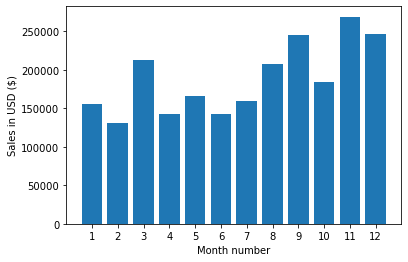

In [9]:
import matplotlib.pyplot as plt

#Total Sales by Year
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [10]:
#Total Sales by Year
df.groupby('Year').Sales.sum()

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales by Year ')

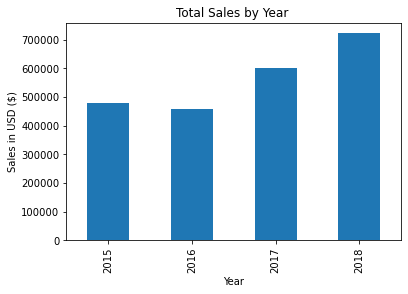

In [11]:
#Graph - Total Sales by Year 
df.groupby('Year').Sales.sum().plot(kind='bar')
plt.ylabel('Sales in USD ($)')
plt.title('Total Sales by Year ')

<AxesSubplot:>

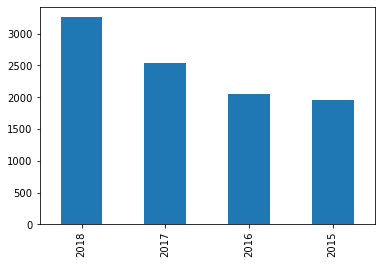

In [12]:
#  Transactions by year
df['Year'].value_counts().plot(kind='bar')

### Question 2: What city sold the most product?

Text(0.5, 1.0, 'Top 10 transactions by City')

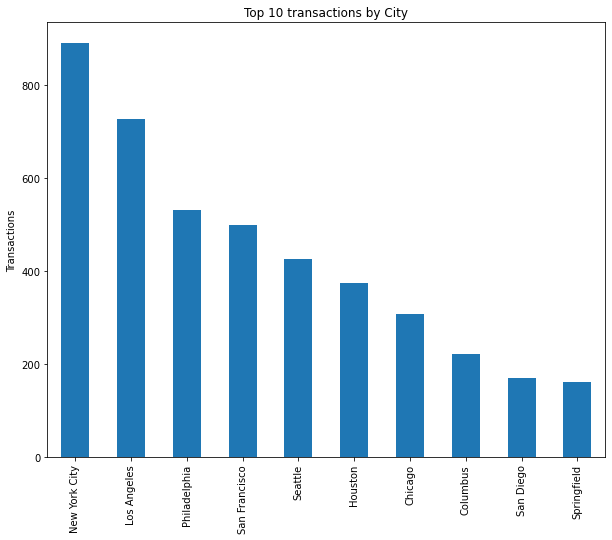

In [13]:
#Top 10 transactions by City
top_10 = df['City'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.ylabel('Transactions')
plt.title('Top 10 transactions by City')

Text(0.5, 1.0, 'Top 10 sales by City')

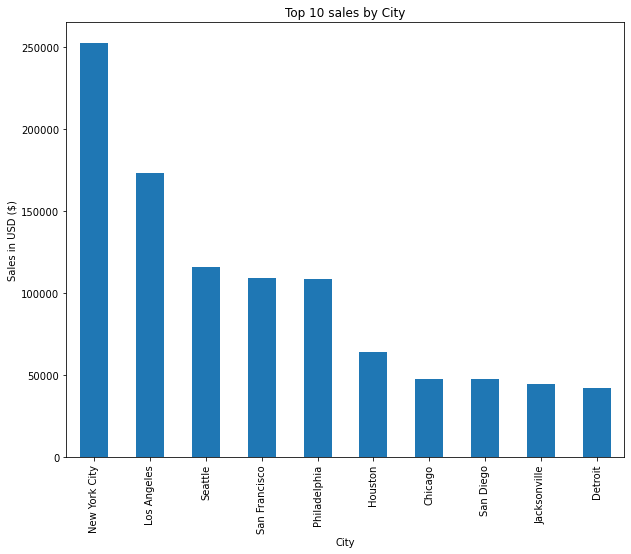

In [14]:
#top 10 Sales by City
top10 = df.groupby('City').Sales.sum().sort_values(ascending = False)[:10]
top10.plot(kind='bar',figsize=(10,8))
plt.ylabel('Sales in USD ($)')
plt.title('Top 10 sales by City')

### Question 3: What products are most often sold together?

In [15]:
#What products are most often sold together?
df2 = df[df['Order ID'].duplicated(keep=False)]

In [16]:
df2['Grouped'] = df2.groupby('Order ID')['Product ID'].transform(lambda x: ','.join(x))
df3 = df2[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-16-90cf33c71dfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product ID'].transform(lambda x: ','.join(x))


In [17]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

# No correlation found

('TEC-PH-10002293', 'OFF-FA-10002780') 2
('OFF-FA-10002780', 'TEC-PH-10000702') 2
('TEC-AC-10000290', 'OFF-PA-10001970') 2
('OFF-PA-10001970', 'OFF-BI-10004995') 2
('OFF-BI-10004584', 'TEC-AC-10004659') 2
('TEC-AC-10004659', 'OFF-ST-10000617') 2
('OFF-ST-10004507', 'OFF-PA-10001667') 2
('OFF-PA-10002005', 'OFF-PA-10004101') 2
('OFF-BI-10000773', 'OFF-BI-10001543') 2
('FUR-FU-10000010', 'OFF-BI-10002824') 2


### Question 4: What product sold the most?

Text(0.5, 1.0, 'Top 10 products sold')

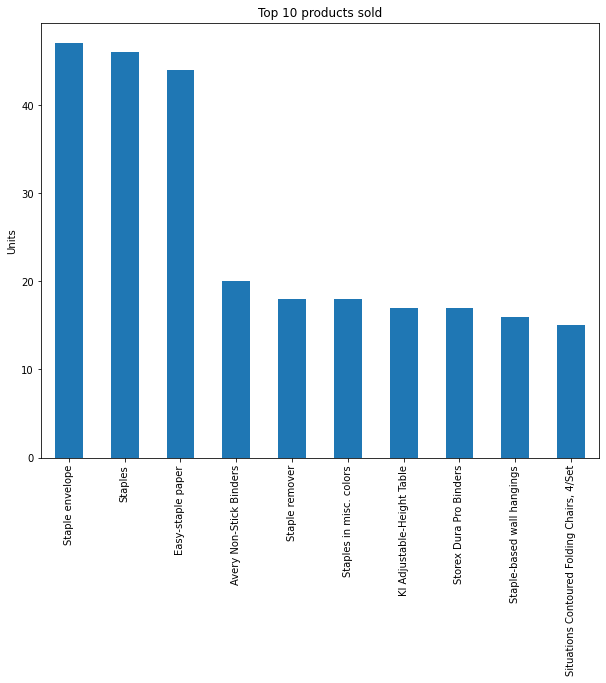

In [18]:
#Top 10 products sold
top_10 = df['Product Name'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.ylabel('Units')
plt.title('Top 10 products sold')

In [19]:
df['Product Name'].value_counts()[:10]

Staple envelope                               47
Staples                                       46
Easy-staple paper                             44
Avery Non-Stick Binders                       20
Staple remover                                18
Staples in misc. colors                       18
KI Adjustable-Height Table                    17
Storex Dura Pro Binders                       17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: Product Name, dtype: int64